<a href="https://colab.research.google.com/github/yoojiwonn/python_data/blob/main/keras_DNN_iris_YJW_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/"  ### [중요!!] Colab의 경우, bmi.csv를 저장할 위치를 기록하시오.
df = pd.read_csv(dir + "iris.csv")    ### [중요!!] https://github.com/jjyjung/ai/blob/gh-pages/bmi.csv 에서 다운받을 수 있습니다.

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,6.4,3.1,5.5,1.8,Iris-virginica
1,6.5,3.0,5.8,2.2,Iris-virginica
2,4.6,3.1,1.5,0.2,Iris-setosa
3,6.4,2.8,5.6,2.1,Iris-virginica
4,5.0,3.3,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,5.1,3.8,1.9,0.4,Iris-setosa
146,5.7,2.8,4.5,1.3,Iris-versicolor
147,6.9,3.1,5.4,2.1,Iris-virginica
148,7.2,3.0,5.8,1.6,Iris-virginica


In [ ]:
# 몸무게와 키 데이터
df["sepal_length"] /= 100   # normalization
df["sepal_width"] /= 200   # normalization
df["petal_length"] /= 200   # normalization
df["petal_width"] /= 200   # normalization
# X = df[["sepal_lenth", "sepal_width","petal_length","petal_width"]].to_numpy()
X = df.iloc[:,0:4]
df
# 레이블링, 라벨링 (labelling) => one-hot encoding
bclass = {"Iris-virginica":[1,0,0], "Iris-setosa":[0,1,0], "Iris-versicolor":[0,0,1]}
y = np.empty((150,3))     # 150x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["iris_type"]):
    y[i] = bclass[v]        # "Iris-virginica"이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:100], y[0:100]
X_test,  y_test  = X[100:150], y[100:150]

In [ ]:
# 모델 구조 정의하기
model = tf.keras.Sequential()         # 순차적 계층화 준비
model.add(layers.Dense(9, input_shape=(4,)))  # 입력 4개로부터 전달받는 9개 노드의 layer 생성
model.add(layers.Activation('relu'))  # ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        # dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))            # 4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))# 분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  # 다중 교차엔트로피
    optimizer="rmsprop",   # 최적화 기법 중 하나
    metrics=['accuracy'])  # 정확도 측정

In [ ]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=10,     # 3개에 한 번씩 업데이터 실행
    epochs=500,          # 훈련 데이터셋을 총 500회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,  
        #validation data 분할 비율. 즉, 100개 중에서 20%인 20개를 validation용으로 분할
    # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)],  
        #'val_loss'를 monitor하여 감소하면 한 번 더 참고 조기중지
    verbose=1)   # 전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/500
8/8 [==============================] - 1s 20ms/step - loss: 1.0974 - accuracy: 0.3125 - val_loss: 1.1010 - val_accuracy: 0.2500
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0959 - accuracy: 0.3875 - val_loss: 1.1022 - val_accuracy: 0.2500
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0952 - accuracy: 0.4000 - val_loss: 1.1032 - val_accuracy: 0.2500
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0937 - accuracy: 0.3875 - val_loss: 1.1042 - val_accuracy: 0.2500
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0956 - accuracy: 0.3625 - val_loss: 1.1050 - val_accuracy: 0.2500
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 1.0917 - accuracy: 0.3875 - val_loss: 1.1062 - val_accuracy: 0.2500
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 1.0905 - accuracy: 0.3875 - val_loss: 1.1073 - val_accuracy: 0.2500
Epoch 8/500
8/8 [=========

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

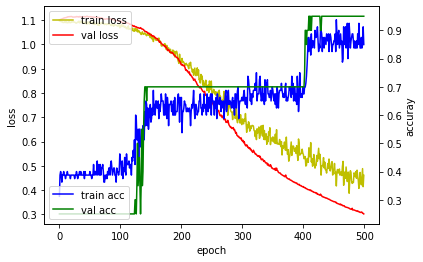

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 9)                 45        
                                                                 
 activation_75 (Activation)  (None, 9)                 0         
                                                                 
 dropout_50 (Dropout)        (None, 9)                 0         
                                                                 
 dense_76 (Dense)            (None, 4)                 40        
                                                                 
 activation_76 (Activation)  (None, 4)                 0         
                                                                 
 dropout_51 (Dropout)        (None, 4)                 0         
                                                                 
 dense_77 (Dense)            (None, 3)               

In [ ]:
model.get_weights()

[array([[ 0.6709025 , -0.74436474,  0.30756164, -0.1685059 , -0.39201078,
          0.90272593, -0.37256438, -0.5212559 ,  0.07052556],
        [-0.17333336,  1.4122282 , -0.64769596,  1.3404028 ,  0.05635369,
         -1.110277  , -0.21234795, -0.17553395, -0.02852893],
        [ 1.6093391 , -2.0588076 ,  2.4805236 , -2.625135  ,  0.03244102,
          2.4678106 ,  0.617988  ,  0.36674166, -2.6640904 ],
        [ 2.9539652 , -2.0647633 ,  2.3787396 , -1.8309871 , -0.44891906,
          2.8188887 ,  0.39295876,  0.06722617, -3.1325953 ]],
       dtype=float32),
 array([-0.04537445,  0.10563427, -0.02282317,  0.08382259,  0.        ,
        -0.04712012,  0.        ,  0.        ,  0.10747746], dtype=float32),
 array([[-0.14719035,  2.344687  , -1.8600905 , -1.5195205 ],
        [ 0.5091382 , -2.2095263 ,  1.4860299 ,  2.9018385 ],
        [-0.05279264,  2.3895886 , -0.93682927, -0.6967635 ],
        [-0.12711303, -2.2522523 ,  2.665402  ,  2.640365  ],
        [ 0.42077374,  0.40466237,

In [ ]:
model.save(dir+"dnn_bmi.h5")
print("Saved model to disk.")

from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 저장된 모델 읽어오기
loaded_model = load_model(dir+"dnn_bmi.h5")
model.summary()

# 모델을 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 9)                 45        
                                                                 
 activation_75 (Activation)  (None, 9)                 0         
                                                                 
 dropout_50 (Dropout)        (None, 9)                 0         
                                                                 
 dense_76 (Dense)            (None, 4)                 40        
                                                                 
 activation_76 (Activation)  (None, 4)                 0         
                                                                 
 dropout_51 (Dropout)        (None, 4)                 0         
                                                                 
 dense_77 (Dense)            (No

In [ ]:
# X_test 샘플들의 클래스 예측하기
y_prob = model.predict(X_test)    # X_test의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # X_test의 클래스 예측하기
y_class

2/2 [==============================] - 0s 4ms/step
[[1.7402085e-03 9.1943759e-01 7.8822128e-02]
 [6.3834584e-01 8.8611891e-04 3.6076808e-01]
 [6.2006176e-01 1.8612890e-03 3.7807703e-01]
 [8.4622681e-02 2.8942871e-01 6.2594849e-01]
 [6.4028579e-01 8.0802693e-04 3.5890627e-01]
 [7.4686686e-04 9.5324796e-01 4.6005249e-02]
 [3.5457083e-04 9.6975106e-01 2.9894302e-02]
 [5.1748269e-04 9.6260452e-01 3.6877841e-02]
 [4.8693672e-01 6.6018808e-03 5.0646144e-01]
 [6.2689966e-01 1.5129700e-03 3.7158734e-01]
 [3.7420136e-01 1.7711952e-02 6.0808665e-01]
 [7.5100490e-04 9.5298761e-01 4.6261329e-02]
 [2.3863767e-01 6.0049709e-02 7.0131260e-01]
 [9.4747043e-04 9.4529498e-01 5.3757392e-02]
 [4.4961628e-01 8.9079961e-03 5.4147571e-01]
 [6.3124454e-01 1.2373490e-03 3.6751810e-01]
 [5.4140443e-01 4.0963320e-03 4.5449927e-01]
 [2.4812642e-01 5.4144856e-02 6.9772869e-01]
 [2.2533381e-01 6.7605019e-02 7.0706117e-01]
 [6.1630312e-04 9.5862734e-01 4.0756445e-02]
 [7.5814733e-04 9.5301569e-01 4.6226211e-02]
 [7.

array([1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 1,
       0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0,
       2, 1, 2, 0, 0, 1])

In [ ]:
# 새로운 샘플의 클래스 예측하기
X_new = [80, 175]
X_new[0]/=100; X_new[1]/=200
print(X_new)

y_prob = model.predict([X_new]) # X_new의 출력값 확인하기
y_pred = y_prob.argmax()        # X_new의 클래스 예측하기
print(y_prob, y_pred)

[0.8, 0.875]


ValueError: ignored

In [ ]:
type(X_test)

In [ ]:
X_test.head()

In [ ]:
X_test.head(5).index.tolist()

In [ ]:
X_test0 = X_test.loc[15000]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

In [ ]:
def predict_bmi(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [ ]:
X_mean = [X_train["height"].mean(), X_train["weight"].mean()]
X_min = [X_train["height"].min(), X_train["weight"].min()]
X_max = [X_train["height"].max(), X_train["weight"].max()]
X_min_max = [X_train["height"].min(), X_train["weight"].max()]
X_max_min = [X_train["height"].max(), X_train["weight"].min()]

predict_bmi(X_mean)
predict_bmi(X_min)
predict_bmi(X_max)
predict_bmi(X_min_max)
predict_bmi(X_max_min)